## Data Cleaning Assignment-1
### By Bhavesh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'Lending Data.xlsx')
data.head()

,Name of Lending Institution,HQ State,Rank,TA Ratio1,TBL Ratio1,"Amount ($1,000)",Number,Lender Asset Size,"Amount ($1,000).1",Number .1,Unnamed: 10,"Amount ($1,000).2",Number .2,CC Amount/TA1
0,NaN,NaN,-1,-2,-3,-4,-5,-6,-7.0,-8.0,NaN,-9.0,-10.0,-11
1,American Express Co.,NY,1,0.23829,0.999544,16350038,3603226,>$50B,16318089.0,3603088.0,NaN,31949.0,138.0,0.28
2,First Citizens Banchares,NC,2,0.187393,0.49083,3914507,117702,$10B-$50B,378394.0,105081.0,NaN,3536113.0,12621.0,.
3,Wintrust Financial Corp.,IL,3,0.168999,0.383561,2842793,136801,$10B-$50B,800526.0,126455.0,NaN,2042267.0,10346.0,0
4,Zions Bancorp,UT,4,0.117973,0.260577,6231770,52612,>$50B,526206.0,32973.0,NaN,5705564.0,19639.0,0


In [3]:
print('dataset shape: ',data.shape)
print(data.info())

dataset shape:  (97, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name of Lending Institution  96 non-null     object 
 1   HQ State                     93 non-null     object 
 2   Rank                         94 non-null     object 
 3   TA Ratio1                    94 non-null     object 
 4   TBL Ratio1                   94 non-null     object 
 5   Amount ($1,000)              94 non-null     object 
 6   Number                       94 non-null     object 
 7   Lender Asset Size            94 non-null     object 
 8   Amount ($1,000).1            94 non-null     float64
 9   Number .1                    94 non-null     float64
 10  Unnamed: 10                  0 non-null      float64
 11  Amount ($1,000).2            94 non-null     float64
 12  Number .2                    94 non-null     float64
 1

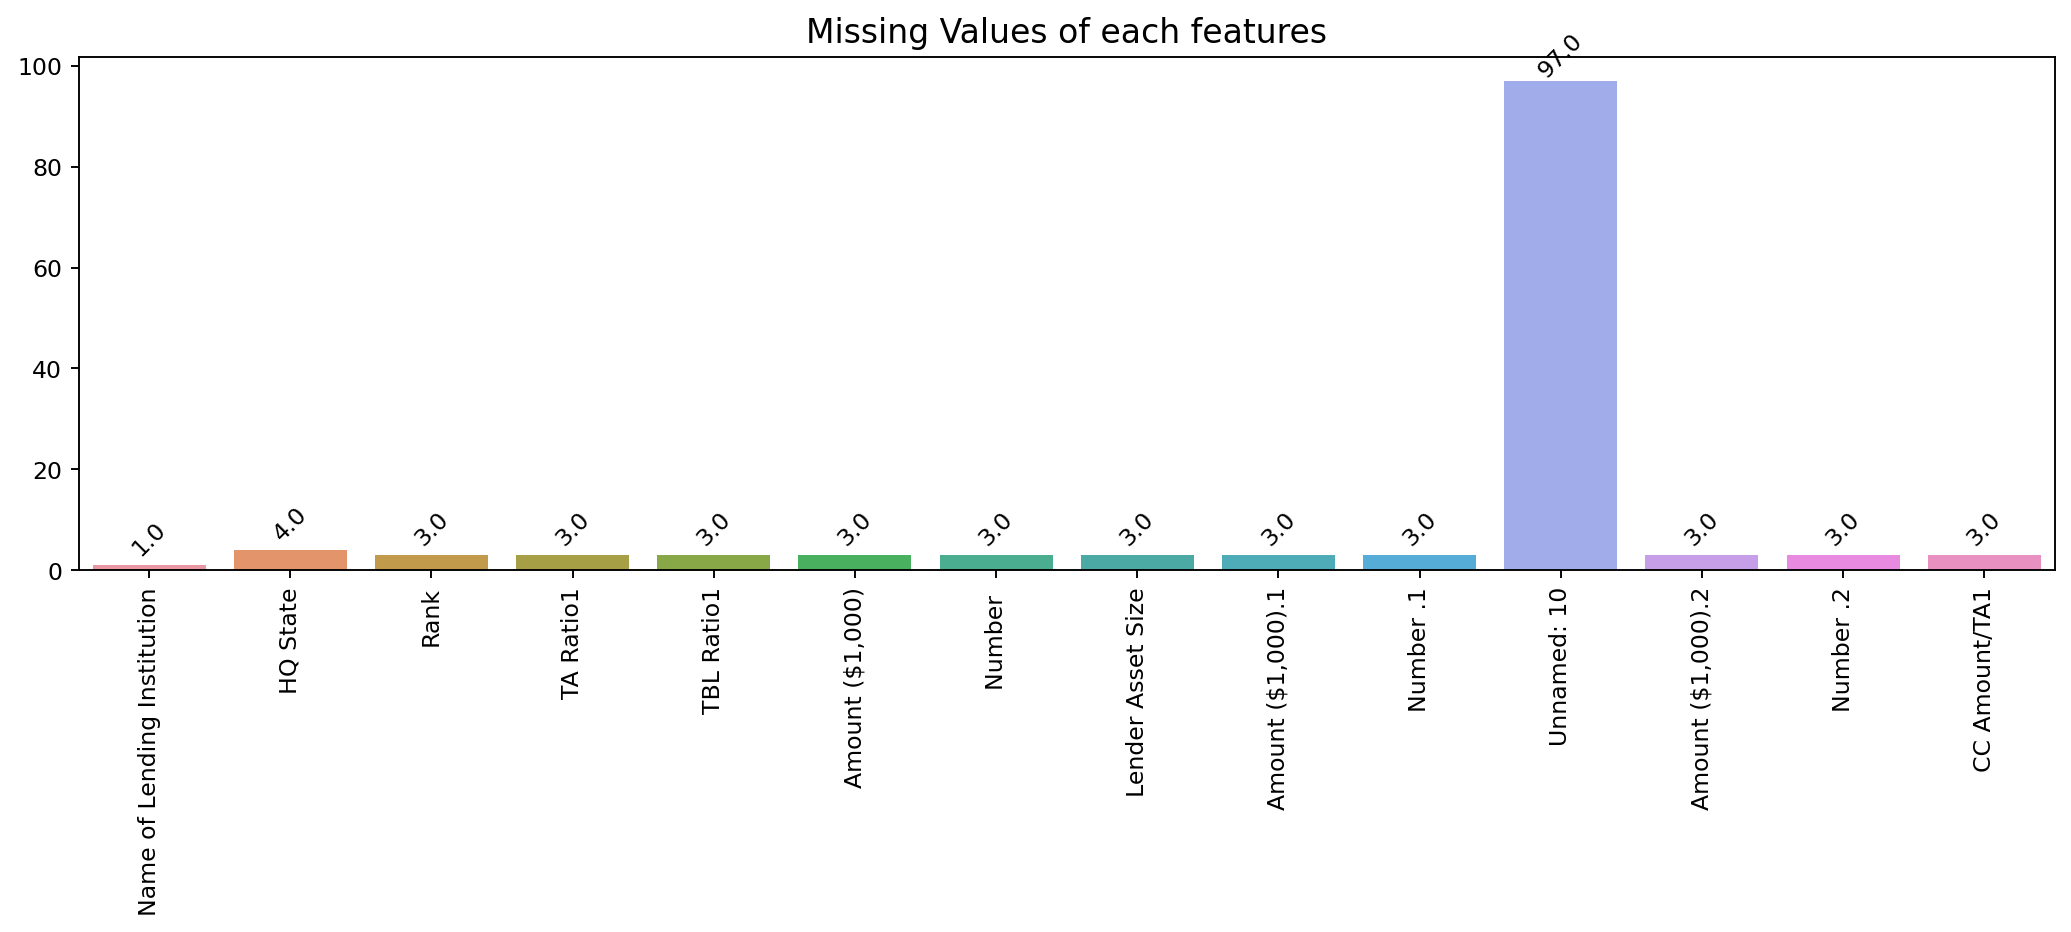

In [4]:
df=data.isna().sum()
plt.figure(figsize=(15, 4),dpi=170)
plt.title('Missing Values of each features',size=14)
splot = sns.barplot(x = df.index , y = df, ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()+0.5), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',rotation='45')
plt.xticks(rotation='vertical')
plt.show()

In [5]:
d=['object','object','int64','float64','float64','float64','float64','object','float64','float64','float64','float64','float64','float64']
for index,x in enumerate(data.columns):
    if d[index] != data[x].dtype:
        print(f"DataType of '{x}' should be {d[index]}")

DataType of 'Rank' should be int64
DataType of 'TA Ratio1' should be float64
DataType of 'TBL Ratio1' should be float64
DataType of 'Amount ($1,000)' should be float64
DataType of 'Number ' should be float64
DataType of 'CC Amount/TA1' should be float64


### Name of Lending Institution has only one null value and it has no proper values so simply removing that row.

In [7]:
data=data.drop(0,axis=0)
data.head(2)

KeyError: '[0] not found in axis'

## 1. Clean Rank with value  '0'. 

In [8]:
data['Rank']=pd.to_numeric(data['Rank'],errors='coerce')
data['Rank']=pd.to_numeric(data['Rank'],errors='coerce')
data['Rank']=data['Rank'].fillna(0)

## 2. Clean '-' values with column mean & 
## 3. Clean '.' with column mean

In [9]:
data=data.replace('-',np.nan)
data=data.replace('    .  ',np.nan)

In [10]:
for i in range(3,7):
    data.iloc[:,i]=pd.to_numeric(data.iloc[:,i],errors='coerce')

data.iloc[:,-1]=pd.to_numeric(data.iloc[:,-1],errors='coerce')

In [11]:
data.head(3)

,Name of Lending Institution,HQ State,Rank,TA Ratio1,TBL Ratio1,"Amount ($1,000)",Number,Lender Asset Size,"Amount ($1,000).1",Number .1,Unnamed: 10,"Amount ($1,000).2",Number .2,CC Amount/TA1
1,American Express Co.,NY,1.0,0.238290,0.999544,16350038.0,3603226.0,>$50B,16318089.0,3603088.0,NaN,31949.0,138.0,0.28
2,First Citizens Banchares,NC,2.0,0.187393,0.490830,3914507.0,117702.0,$10B-$50B,378394.0,105081.0,NaN,3536113.0,12621.0,NaN
3,Wintrust Financial Corp.,IL,3.0,0.168999,0.383561,2842793.0,136801.0,$10B-$50B,800526.0,126455.0,NaN,2042267.0,10346.0,0.00


In [11]:
data.iloc[:,[3,4,5,6,-1,-2,-3,-5,-6]]=data.iloc[:,[3,4,5,6,-1,-2,-3,-5,-6]].fillna(
                                                                value=data.iloc[:,[3,4,5,6,-1,-2,-3,-5,-6]].mean())

# Removing columns with having more than 20 null values
* Unnamed:10 column will be removed.

In [12]:
data.dropna(thresh=20,axis=1,inplace=True)

In [13]:
data.head(2)

,Name of Lending Institution,HQ State,Rank,TA Ratio1,TBL Ratio1,"Amount ($1,000)",Number,Lender Asset Size,"Amount ($1,000).1",Number .1,"Amount ($1,000).2",Number .2,CC Amount/TA1
1,American Express Co.,NY,1.0,0.238290,0.999544,16350038.0,3603226.0,>$50B,16318089.0,3603088.0,31949.0,138.0,0.28
2,First Citizens Banchares,NC,2.0,0.187393,0.490830,3914507.0,117702.0,$10B-$50B,378394.0,105081.0,3536113.0,12621.0,NaN


In [14]:
data.isna().sum()

Name of Lending Institution    0
HQ State                       3
Rank                           0
TA Ratio1                      0
TBL Ratio1                     0
Amount ($1,000)                0
Number                         0
Lender Asset Size              3
Amount ($1,000).1              0
Number .1                      0
Amount ($1,000).2              0
Number .2                      0
CC Amount/TA1                  0
dtype: int64

## 4. Convert Lending Asset Size = Category like 0, 1, 2 etc based on levels available

In [15]:
data.head(3)

,Name of Lending Institution,HQ State,Rank,TA Ratio1,TBL Ratio1,"Amount ($1,000)",Number,Lender Asset Size,"Amount ($1,000).1",Number .1,"Amount ($1,000).2",Number .2,CC Amount/TA1
1,American Express Co.,NY,1.0,0.238290,0.999544,16350038.0,3603226.0,>$50B,16318089.0,3603088.0,31949.0,138.0,0.28000
2,First Citizens Banchares,NC,2.0,0.187393,0.490830,3914507.0,117702.0,$10B-$50B,378394.0,105081.0,3536113.0,12621.0,0.02087
3,Wintrust Financial Corp.,IL,3.0,0.168999,0.383561,2842793.0,136801.0,$10B-$50B,800526.0,126455.0,2042267.0,10346.0,0.00000


In [16]:
print(data.iloc[:,-6].unique(),'\n')
print(data.iloc[:,-6].value_counts())

['>$50B               ' '$10B-$50B           ' '>$10B               ' nan] 

$10B-$50B               43
>$50B                   32
>$10B                   18
Name: Lender Asset Size, dtype: int64


In [17]:
data.iloc[:,-6].mode()

0    $10B-$50B           
dtype: object

In [18]:
data.iloc[:,-6].fillna(data.iloc[:,-6].mode(),inplace=True)

In [19]:
data.iloc[:,-6]=data.iloc[:,-6].apply(lambda x: 0 if str(x).strip()==r'>$10B' else 1 if str(x).strip()==r'$10B-$50B' else 2)

### replacing all null values of HQ State with frequent state NY.

In [20]:
data['HQ State'].fillna('NY',inplace=True)

In [21]:
data.loc[94:,'HQ State']

94    NY
95    NY
96    NY
Name: HQ State, dtype: object

In [22]:
data.isna().sum()

Name of Lending Institution    0
HQ State                       0
Rank                           0
TA Ratio1                      0
TBL Ratio1                     0
Amount ($1,000)                0
Number                         0
Lender Asset Size              0
Amount ($1,000).1              0
Number .1                      0
Amount ($1,000).2              0
Number .2                      0
CC Amount/TA1                  0
dtype: int64

In [23]:
data.dtypes

Name of Lending Institution     object
HQ State                        object
Rank                           float64
TA Ratio1                      float64
TBL Ratio1                     float64
Amount ($1,000)                float64
Number                         float64
Lender Asset Size                int64
Amount ($1,000).1              float64
Number .1                      float64
Amount ($1,000).2              float64
Number .2                      float64
CC Amount/TA1                  float64
dtype: object

## Cleaned Dataset

In [24]:
data.head()

,Name of Lending Institution,HQ State,Rank,TA Ratio1,TBL Ratio1,"Amount ($1,000)",Number,Lender Asset Size,"Amount ($1,000).1",Number .1,"Amount ($1,000).2",Number .2,CC Amount/TA1
1,American Express Co.,NY,1.0,0.238290,0.999544,16350038.0,3603226.0,2,16318089.0,3603088.0,31949.0,138.0,0.28000
2,First Citizens Banchares,NC,2.0,0.187393,0.490830,3914507.0,117702.0,1,378394.0,105081.0,3536113.0,12621.0,0.02087
3,Wintrust Financial Corp.,IL,3.0,0.168999,0.383561,2842793.0,136801.0,1,800526.0,126455.0,2042267.0,10346.0,0.00000
4,Zions Bancorp,UT,4.0,0.117973,0.260577,6231770.0,52612.0,2,526206.0,32973.0,5705564.0,19639.0,0.00000
5,Synovus Financial Corp.,GA,5.0,0.162333,0.381387,4227168.0,22675.0,1,539666.0,9593.0,3687502.0,13082.0,0.01000


### Saving in csv format

In [25]:
data.to_csv('cleaned_lender_dataset.csv',index=False)